In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

url = "https://raw.githubusercontent.com/MathiasToval/Coder2/main/storytelling.csv"
df = pd.read_csv(url)

df.tail()

,artist,song,duration_s,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,numero_genero,hit
2810,Old Dominion,One Man Band,186.240,False,2019,76,0.706,0.358,6,-8.331,1,0.0347,0.6770,0.000000,0.1070,0.478,75.991,"contemporary country, country, country road, m...",195,1
2811,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,157.560,False,2019,83,0.755,0.522,2,-4.368,1,0.0575,0.5330,0.000000,0.0685,0.925,89.960,"dfw rap, melodic rap, pop, rap",335,1
2812,Billie Eilish,when the party's over,196.077,False,2019,84,0.367,0.111,4,-14.084,1,0.0972,0.9780,0.000040,0.0897,0.198,82.642,"art pop, electropop, pop",363,1
2813,Gesaffelstein,Lost in the Fire (feat. The Weeknd),202.093,True,2019,85,0.658,0.671,2,-12.210,1,0.0363,0.0933,0.000927,0.1150,0.166,100.966,dark clubbing,383,1
2814,Lil Tecca,Ransom,131.240,True,2019,82,0.745,0.642,7,-6.257,0,0.2870,0.0204,0.000000,0.0658,0.226,179.974,"melodic rap, pluggnb, rap",384,1


In [ ]:
genre_column = df["artist"]
unique_genres = genre_column.unique()
num_unique_genres = len(unique_genres)
print("Hay", num_unique_genres, "géneros distintos en la columna de género.")

Hay 1000 géneros distintos en la columna de género.


# Relación entre sonoridad y popularidad de un HIT en las ultimas dos decadas
Cuando hablamos de Sonoridad nos referimos alatributo que nos permite ordenar sonidos en una escala del de mayor intensidad al de menor intensidad. Por lo tanto, resulta interesante determinar si existe o no, una relación entre la intensidad general de una canción ("Loudness") y su popularidad ("Popularity")

Text(0, 0.5, 'Sonoridad (dBFS)')

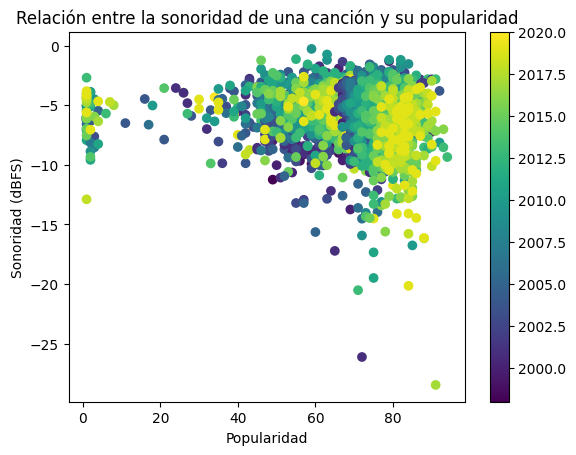

In [ ]:
popularidad = df["popularity"]
popularidad = popularidad.tolist()
sonoridad = df["loudness"]
sonoridad = sonoridad.tolist()

fig, ax = plt.subplots()  
mapeo_colores = ax.scatter(popularidad,sonoridad, c=df["year"])
fig.colorbar(mapeo_colores)
ax.set_title('Relación entre la sonoridad de una canción y su popularidad')
ax.set_xlabel('Popularidad')
ax.set_ylabel('Sonoridad (dBFS)')

Como se puede observar, podemos encontrar cierta cantidad de puntos con popularidad realmente baja. Esto podria ser consecuencia de dos factores claves. El hecho de que el modelo que se haya utilizado para medir la popularidad de las canciones tenga ciertos errores. O, suponiendo que la popularidad del tema se mide en base a la cantidad de reproducciones, se plantea el hecho de que la cantidad de gente que haya escuchado musica en spotify durante los primeros años de medición sea mucho menor que en los ultimos años. Lo cual podria alterar las mediciones.

Aunque esa ultima hipotesis resultaria no ser cierta, debido a que, como se ve en el grafico, la mayoria de los puntos con popularidad muy baja tienen tonalidades mayores a las que corresponden al año 2015. Esto explicaria el hecho de que la cantidad de usuarios durante los años, no sean un factor determinante a la hora de calcular la popularidad de los HITS.

Por estas razones, en ciertos graficos posteriores, se tomó la decisión de darle importancia, principalmente a los valores cuya popularidad se encuentre por encima de 20.

En cuanto al análisis del grafico en si. La escala que se presenta en el eje Y refiere a "dBFS". La cantidad de decibeles de distancia se encuentra la canción del maximo nivel disponible digitalmente en un sistema especifico. Posterior a los 0dBFS se encontraria la saturación del audio.

 Por lo tanto, se puede observar como en los ultimos años, mas allá de la popularidad del tema, se estuvo tomando como convención el rango de entre los -10 a los -3 dB. Esto puede deberse principalmente a la preferencia de nivel del publico y ademas a las capacidades de los equipos de audio convencionales a traves de la ultima decada.
 
  En cuanto a la popularidad, se puede ver como la relación es practicamente horizontal, los temas mas populares siempre mantendran el rango dinamico planteado anteriormente.

# Análisis de la duración de los HITS de las ultimas dos decadas

Otra cuestión importante a señalar, es la duración estandar de las canciones mas relevantes de las ultimas decadas.

Text(0, 0.5, 'Frecuencia absoluta')

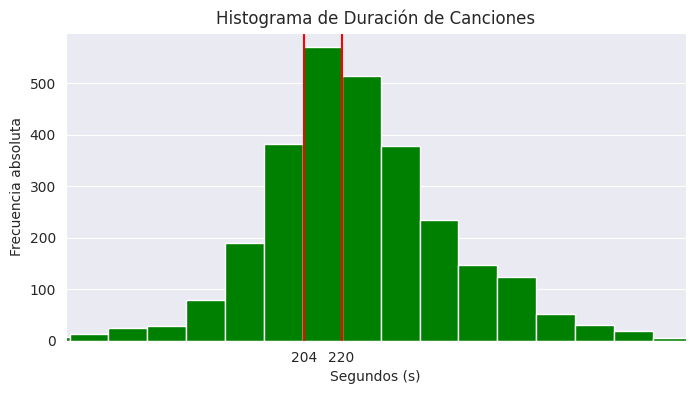

In [ ]:
duracion = df["duration_s"]
duracion = duracion.tolist()

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(duracion, bins=30, color='green') 
ax.set_xlim(left=100, right=370)
ax.set_xscale('linear')
ax.set_xticks([204, 220])
ax.set_xticklabels(['204', '220'])
ax.axvline(x=220.5, color='red')
ax.axvline(x=204, color='red')
ax.set_title('Histograma de Duración de Canciones')
ax.set_xlabel('Segundos (s)')
ax.set_ylabel('Frecuencia absoluta')

Como suele ser costumbre, desde decadas anteriores. La duración de los temas suele plantearse, mayoritariamente, entre los 3 y 4 minutos. Mas especificamente, entre los 204 y 220 segundos. Esto puede ser consecuencia de dos factores relevantes.
 
1. El tiempo de concentración y atención a nivel cognitivo del humano
2. La musica como negocio, la industria, y la necesidad de generar una satisfacción inmediata en el oyente

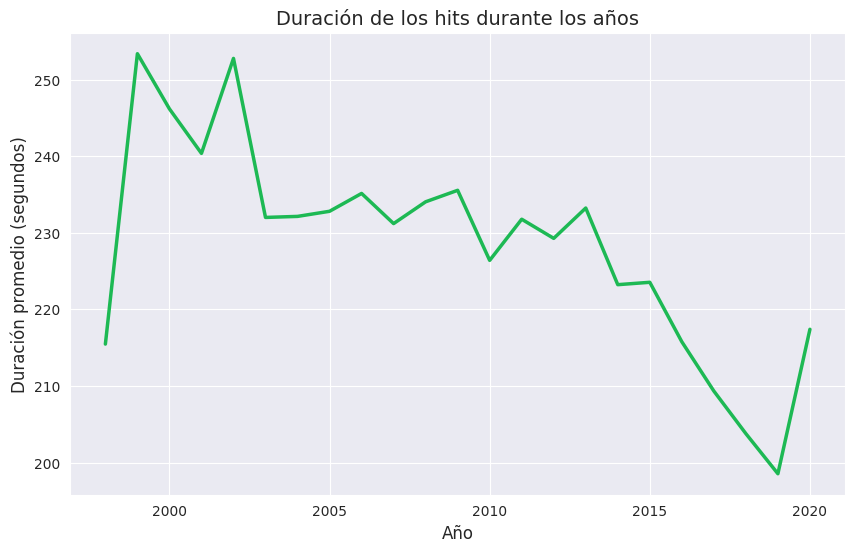

In [ ]:
grouped_df = df.groupby("year")["duration_s"].mean()

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=grouped_df.index, y=grouped_df.values, color="#1DB954", linewidth=2.5)

plt.xlabel("Año", fontsize=12)
plt.ylabel("Duración promedio (segundos)", fontsize=12)
plt.title("Duración de los hits durante los años", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Como se puede ver en el grafico, a traves de los años la duración media de las canciones mas exitosas fue disminuyendo. Esto puede deberse a los cambios en la industria musica. Ya que la industria musical ha experimentado una serie de cambios significativos en las últimas décadas, como la introducción de descargas digitales y servicios de streaming, lo que ha llevado a una mayor competencia y una mayor presión para crear música más accesible y fácil de consumir.

# Generos musicales mas populares

Text(0, 0.5, 'Frecuencia absoluta')

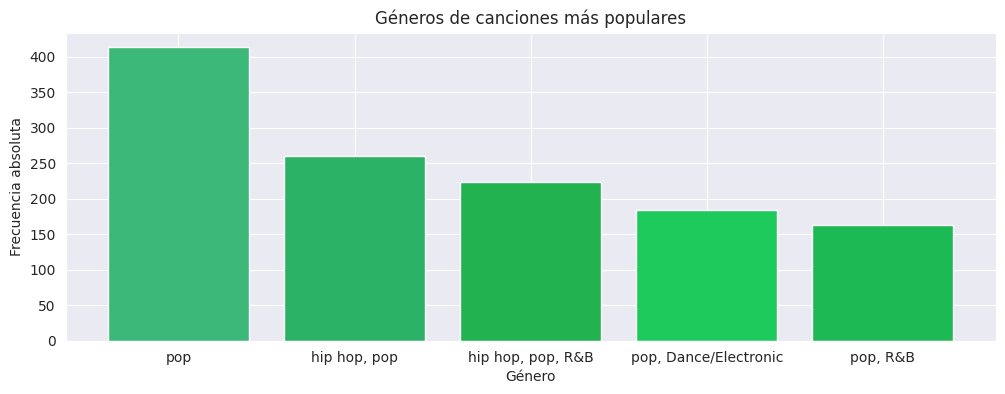

In [ ]:


fig, ax = plt.subplots(figsize=(12,4))

generos_counts = df["genre"].value_counts()
generos_top_5 = generos_counts.head(5)

colors = ["#1DB954", "#1ED760", "#24A148", "#2EB872", "#32A45F", "#35AB5C", "#39AD51", "#3CB878"]

spotify_colors = mcolors.LinearSegmentedColormap.from_list("spotify_colors", colors)

colormap = spotify_colors
norm = plt.Normalize(vmin=min(generos_top_5.values), vmax=max(generos_top_5.values))

ax.bar(generos_top_5.index, generos_top_5.values,color=colormap(norm(generos_top_5.values)))

ax.set_title("Géneros de canciones más populares")
ax.set_xlabel("Género")
ax.set_ylabel("Frecuencia absoluta")

Los generos mas escuchados representan la actitud y forma de ser de una generación. Como es común, la musica popular es sino, uno  de los puntos de partida mas relevantes a la hora de hacer un HIT. Aun asi, en las ultimas decadas, el auge de la musica urbana (HIP HOP), representa el segundo puesto. Aunque con una gran diferencia respecto al pop.

# Energia y valencia de los hits de las ultimas dos decadas

Text(0, 0.5, 'Porcentaje')

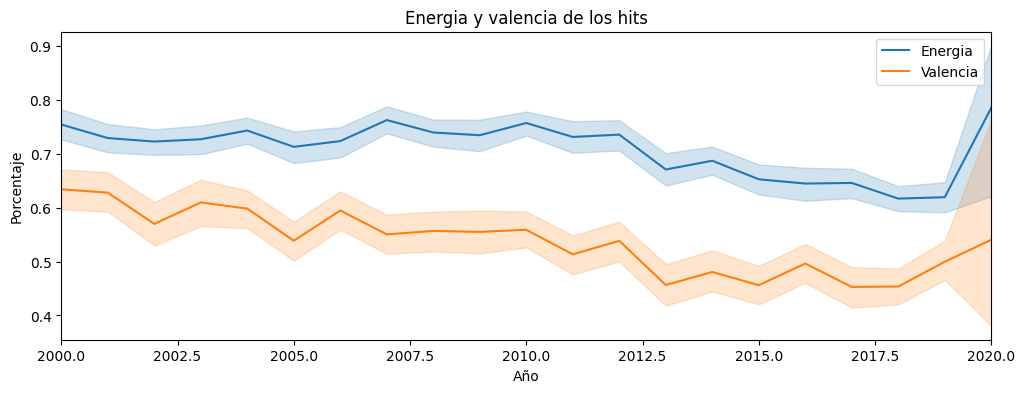

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
plt.xlim(2000,2020)
sns.lineplot(data=df, x="year", y="energy", label= "Energia",ax=ax)
sns.lineplot(data=df, x="year", y="valence",label= "Valencia", ax=ax)
plt.title("Energia y valencia de los hits")
plt.xlabel("Año")
plt.ylabel("Porcentaje")


Cuando nos referimos a la energia de un tema, nos referimos a la medida percibida en cuanto a la intensidad y actividad de un tema. Y la valencia, refiere de cierta forma, al "estado de animo" que representa la canción. Siendo mayor la valencia en temas alegres o euforicos y menos en temas mas tristes o que representen emociones negativas.

Como se puede ver, de cierta forma, se empieza a dar una correlación entre la valencia y la energia a partir de los 10'. Lo que podria explicarse como una mayor coherencia musical entre ambos aspectos.

En base a la comparación anterior, planteamos un grafico en el que se pueda determinar la relación entre la energia de un HIT y su popularidad.

Text(0, 0.5, 'Popularidad')

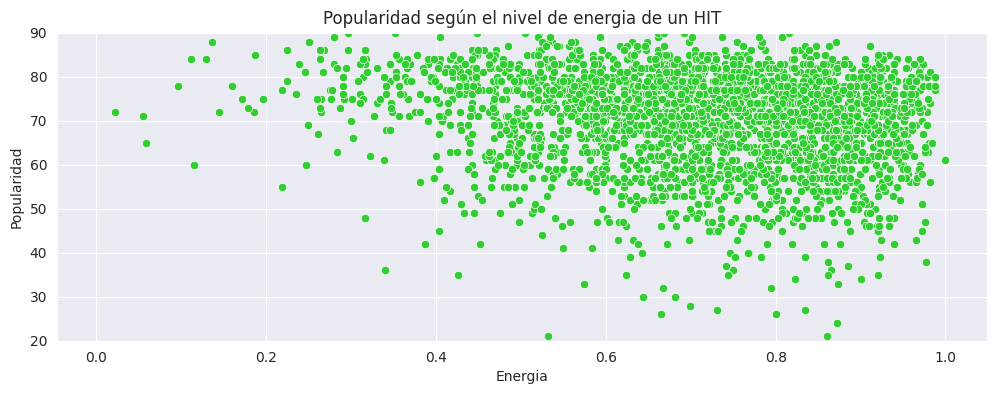

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
sns.scatterplot(data=df, x="energy", y="popularity", color="limegreen",ax=ax)
#Determinamos valor de popularidad mayor a 40.
plt.ylim(20,90) #popularidad minima relevante
plt.title("Popularidad según el nivel de energia de un HIT")
plt.xlabel("Energia")
plt.ylabel("Popularidad")


Como se puede observar, las canciones cuyo valor energetico se valora por encima de 0.5, presentan una popularidad, generalmente, mayor a 50 (en una escala del 1 al 100). 

 Ademas, es posible determinar que la gran mayoria de las canciones que forman parte del dataset, poseen un nivel energetico mayor al marcado anteriormente.

 Esto puede demostrar que desde hace 20 años atras, las canciones mas relevantes suelen plantear ritmos bastante energeticos, esto puede tener diferentes efectos en sus oyentes, dependiendo de la persona y del contexto en el que se escucha la música. Sin embargo, en general, una canción con mucha energía puede causar asimismo un aumento de la misma, un mejora del estado de ánimo, y una mayor concentración. Estados que son mayoritariamente anhelados en la sociedad actual.

#Tonos musicales mas usados en los TOP 5 Generos


Text(0, 0.5, 'Cantidad')

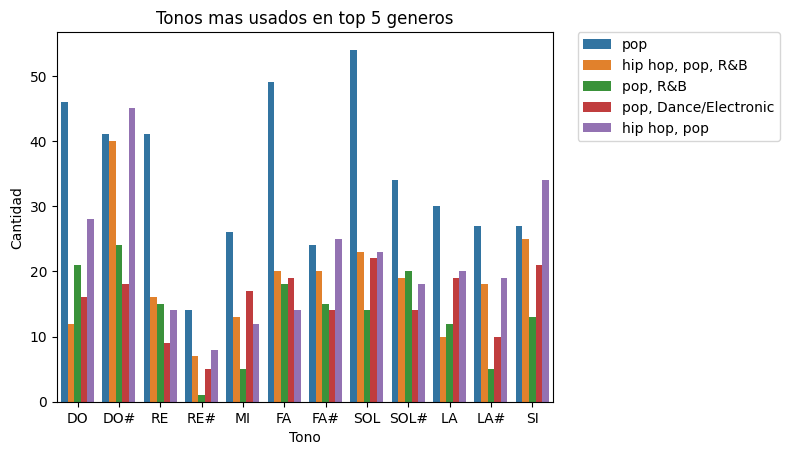

In [ ]:
#TONOS MAS USADOS DE LOS TOP 5 GENEROS
notas = ['DO','DO#','RE','RE#','MI','FA','FA#','SOL','SOL#','LA','LA#','SI']
generos_counts = df["genre"].value_counts() #Funcion previamente usada
generos_top_5 = generos_counts.head(5) 
df_top_5 = df[df["genre"].isin(generos_top_5.index)]

plt.figure()
sns.countplot(x='key', hue='genre', data=df_top_5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(np.arange(0, 12), notas)
plt.title("Tonos mas usados en top 5 generos")
plt.xlabel("Tono")
plt.ylabel("Cantidad")



Al contrario de lo que se hubiera especulado, en general no existe un tono en particular que defina el exito de una canción en la industria de forma muy marcada. Aun asi se puede observar, principalmente en el pop, que tonos como do, fa y sol son tonos sumamente relevantes para definir su impronta y relevancia. En cuanto a los demas generos, se mantiene cierta correlación en los usos de los tonos. Aunque, planteando el Re sostenido, se puede ver que es el tono menos usado, y mas aún en el R&B. Esto puede ser consecuencia de las escalas convencionales que se utilizan en dicho genero.

#Tonos mas populares 2000-2020


Text(0, 0.5, 'Popularidad')

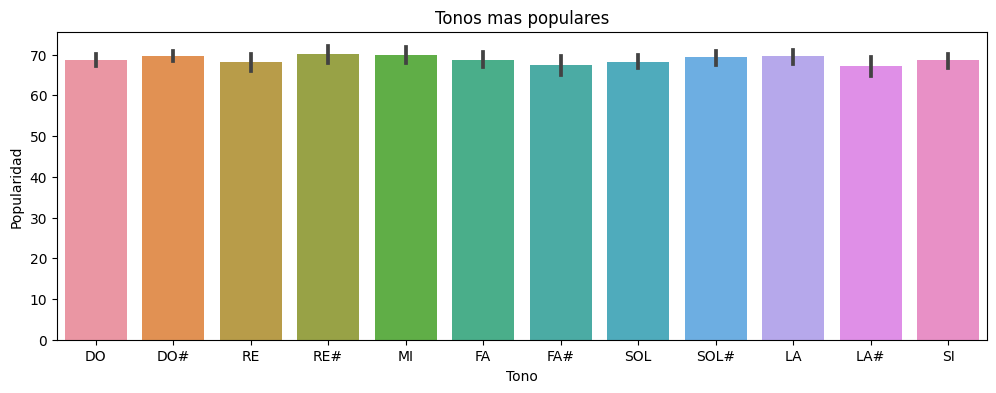

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(data=df, x='key', y='popularity')
plt.xticks(np.arange(0, 12), notas)
plt.title("Tonos mas populares")
plt.xlabel("Tono")
plt.ylabel("Popularidad")

Como se permite ver en el grafico, las velas no difieren mucho en popularidad entre si, por lo que se puede comprender que no hay un tono preferente a la hora de plantear canciones de exito. La unica vela que se puede entender con cierta superioridad en cuanto a popularidad es la de RE#, que ironicamente es el tono menos utilizado dentro del TOP. (Esto puede deberse a la poca cantidad de datos con respecto a los demas tonos, y por lo tanto, estar presentando un dato con un margen de error poco acotado)

# Relación entre el modo y la popularidad de un hit

Text(0, 0.5, 'Popularidad')

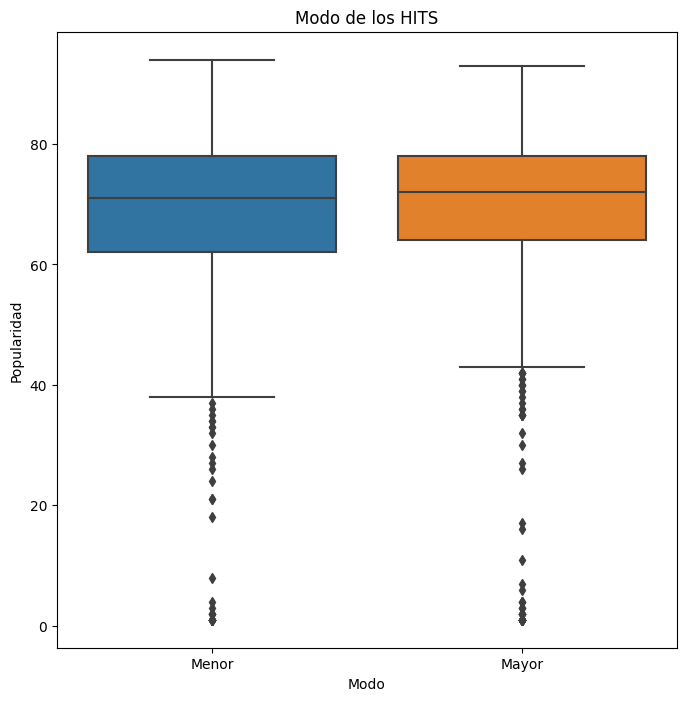

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=df, x="mode", y="popularity")
ax.set_xticklabels(["Menor", "Mayor"])
plt.title("Modo de los HITS")
plt.xlabel("Modo")
plt.ylabel("Popularidad")

Cuando nos referimos al modo en el que se encuentra una canción, nos referimos a si la tonalidad es mayor o menor. Las tonalidades mayores representan estados animicos mas positivos (felicidad, euforia, etc) y los menores, sentimientos mas sombrios o negativos (tristeza, melancolia, entre otros).

Como se puede ver en el grafico, la diferencia de popularidad entre ambos modos es practicamente minima. Y la varianza, un poco inferior en el modo menor. 

En cuanto a los outliers, podemos observar una gran cantidad en ambos casos, por debajo de aproximadamente los 40 puntos. Aun asi, en las tonalidades menores, podemos observar una mayor densidad con un nivel superior de popularidad.


---


# INSIGHTS 📊



*   Con el pasar de los años, hasta el 2020, las canciones con mas popularidad tienden a tener un rango de sonoridad mas amplio, pero siempre concentrandose entre los niveles mas cercanos al nivel de saturación de los equipos de audio.
*   La duración media de las canciones mas populares esta entre los 204 y 220 segundos.
*   El genero predominante en las canciones mas populares, entre 2000 y 2019, es el pop.
*   La mayoria de exitos comerciales suelen tener una mayor "energia".
*   Centrandonos en el genero mas popular, que es el pop. Aquellas canciones que se encuentran en DO, FA o SOL. Son las que mas caracterizan al genero y tienen mayor probabilidad de exito. 
Sin embargo, no existe una tonalidad en particular que defina el exito de todas las canciones de todos los generos.

# RECOMENDACIONES 📑

Con los insights obtenidos, podemos inferir en que, para que una canción tenga un mayor exito comercial debe seguir una serie de pautas en base al genero al que pertenece.
 Aun asi, mas allá del genero, hay ciertas componentes, sumamente relevantes, que pueden afectar al exito de la canción.

*   La canción debe encontrarse entre un rango de sonoridad de entre -10 y -5 dBFS. En definitiva, debe tener la capacidad de alcanzar un nivel alto de volumen en los dispositivos de audio.
*   La duración de la canción debe ser de aproximadamente 3 minutos y medio.
*   Si se busca que la canción tenga mayor exito, tiene que ser parte del genero POP. O al menos tener ciertas componentes que la vuelvan una canción capaz de encasillarse en dicho genero.
*   La intención de la canción debe tener un buen nivel "energetico". Es decir, que lleve a su oyente a experimentar sentimientos mas intensos.
*  Teniendo en cuenta que la canción posee ciertos componentes propios del POP, se debe procurar que las tonalidades sean, preferentemente, DO, FA o SOL. Ya que estas tienen mayor porcentaje de uso dentro de las canciones mas exitosas, ademas de que entre estas tonalidades existe cierta relación armonica que puede evocar ciertos sentimientos parecidos en los oyentes.


